In [100]:
import pandas as pd
import matplotlib.pyplot as plt


In [115]:
df_consultas = pd.read_csv("consultasambu.csv")


In [102]:
df_consultas = df_consultas.dropna(how='all')
df_consultas = df_consultas.dropna(axis=1, how='all')
df_consultas

,Data/Hora_ Consulta Ambulatorial,Especialidade,Município,Idade,Sexo
0,02/01/2023 07:00,PSIQUIATRIA PEDIATRICA,NATAL,14.0,FEMININO
1,02/01/2023 07:00,PSIQUIATRIA PEDIATRICA,SÃO TOMÉ,13.0,MASCULINO
2,02/01/2023 07:00,PSIQUIATRIA PEDIATRICA,TANGARÁ,17.0,MASCULINO
3,02/01/2023 07:00,PSIQUIATRIA PEDIATRICA,NATAL,16.0,FEMININO
4,02/01/2023 07:00,NEUROLOGIA,NÍSIA FLORESTA,28.0,MASCULINO
...,...,...,...,...,...
212188,29/12/2023 15:00,OFTALMOLOGIA,CORONEL JOÃO PESSOA,86.0,MASCULINO
212189,29/12/2023 15:00,OFTALMOLOGIA,CRUZETA,20.0,FEMININO
212190,29/12/2023 16:00,OTORRINOLARINGOLOGIA,CAICÓ,27.0,MASCULINO
212191,29/12/2023 16:00,OTORRINOLARINGOLOGIA,SÃO PAULO DO POTENGI,70.0,FEMININO


In [103]:
media_maiorid_por_municipio = df_consultas.groupby('Município')['Idade'].mean().sort_values(ascending=False)
media_maiorid_por_municipio.head(10)

Município
SANTA FÉ                    93.000000
SANTO ANTÔNIO DO POTENGI    88.000000
MATÃO                       83.000000
NOVA FLORESTA               81.000000
CAMPINA GRANDE              80.000000
LAGOA DA PEDRA              73.000000
SALVA VIDA                  72.000000
RECIFE                      70.777778
ITAPECERICA DA SERRA        69.000000
TACIMA                      64.000000
Name: Idade, dtype: float64

In [104]:
media_menorid_municipio = df_consultas.groupby('Município')['Idade'].mean().sort_values(ascending=True)
media_menorid_municipio

Município
BARRA DE SANTA ROSA          4.0
PRESIDENTE JUSCELINO         4.5
LAGOA DAS PEDRAS             5.0
VILA VERDE                   6.0
CAMOCIM                      7.0
                            ... 
CAMPINA GRANDE              80.0
NOVA FLORESTA               81.0
MATÃO                       83.0
SANTO ANTÔNIO DO POTENGI    88.0
SANTA FÉ                    93.0
Name: Idade, Length: 242, dtype: float64

In [105]:
media = df_consultas['Idade'].mean()
mediana = df_consultas['Idade'].median()
assimetria = media - mediana
print(f"\nMédia da idade: {media:.2f}")
print(f"Mediana da idade: {mediana:.2f}")
print(f"Assimetria (média - mediana): {assimetria:.2f}")


Média da idade: 44.00
Mediana da idade: 48.00
Assimetria (média - mediana): -4.00


In [106]:
q1 = df_consultas['Idade'].quantile(0.25)
q2 = df_consultas['Idade'].quantile(0.50)  
q3 = df_consultas['Idade'].quantile(0.75)
iqr = q3 - q1
limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr
outliers = df_consultas[(df_consultas['Idade'] < limite_inferior) | (df_consultas['Idade'] > limite_superior)]
print("Q1 (25%):", q1)
print("Q2 (Mediana):", q2)
print("Q3 (75%):", q3)
print("IQR:", iqr)
print("Limite inferior para outliers:", limite_inferior)
print("Limite superior para outliers:", limite_superior)


Q1 (25%): 26.0
Q2 (Mediana): 48.0
Q3 (75%): 63.0
IQR: 37.0
Limite inferior para outliers: -29.5
Limite superior para outliers: 118.5


In [107]:
especialidade_idade = df_consultas.groupby('Especialidade')['Idade'].mean().sort_values(ascending=False)
especialidade_idade

Especialidade
GERIATRIA                       75.696970
CLINICA GERAL                   69.375887
ONCOLOGIA CLÍNICA               61.364917
CIRURGIA ONCOLOGICA             59.135852
CIRURGIA CARDIACA               58.750000
                                  ...    
ALERGOLOGIA PEDIATRICA           5.932902
CIRURGIA PEDIATRICA GERAL        4.881579
GASTROENTEROLOGIA PEDIÁTRICA     4.710038
INFECTOLOGIA PEDIÁTRICA          2.823374
PEDIATRIA                        2.401686
Name: Idade, Length: 65, dtype: float64

In [108]:
especialidades = df_consultas.groupby(['Especialidade']).size().reset_index(name='Consultas')
especialidades


,Especialidade,Consultas
0,ALERGOLOGIA PEDIATRICA,1237
1,ANESTESIOLOGIA,1467
2,CARDIOLOGIA,14810
3,CARDIOLOGIA PEDIÁTRICA,2534
4,CIRURGIA BARIATRICA,1088
...,...,...
60,SERVIÇO SOCIAL,560
61,TERAPIA OCUPACIONAL,2946
62,TRANSPLANTE RENAL UROLOGIA,308
63,TX RENAL - PROCEDIMENTOS,121


In [109]:
consultas_sexo = df_consultas.groupby(['Sexo']).size().reset_index(name='Consultas')
consultas_sexo 


,Sexo,Consultas
0,FEMININO,115989
1,INFEFINIDO,48
2,MASCULINO,92130


In [110]:
media_idade_sexo = df_consultas.groupby('Sexo')['Idade'].mean().sort_values(ascending=False)
media_idade_sexo

Sexo
FEMININO      44.794403
INFEFINIDO    44.416667
MASCULINO     43.197547
Name: Idade, dtype: float64

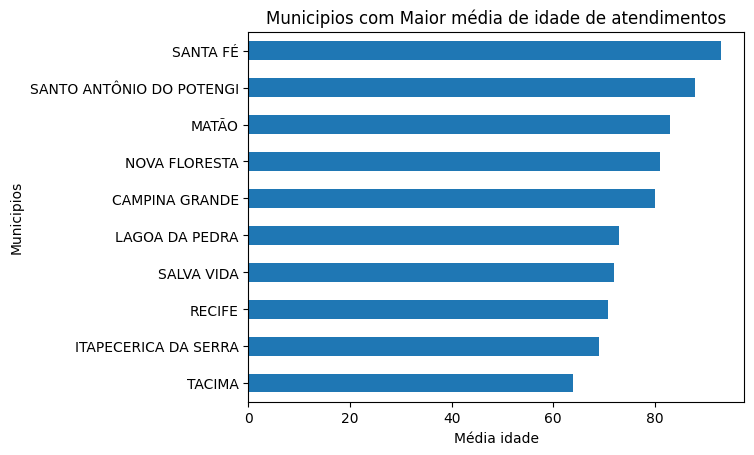

Município
SANTA FÉ                    93.0
SANTO ANTÔNIO DO POTENGI    88.0
MATÃO                       83.0
NOVA FLORESTA               81.0
CAMPINA GRANDE              80.0
Name: Idade, dtype: float64

In [111]:
top10_media_maiorid_por_municipio = media_maiorid_por_municipio.head(10).sort_values(ascending=True)
top10_media_maiorid_por_municipio.plot(kind='barh', x='Município', y='Idade')
plt.xlabel('Média idade')
plt.ylabel('Municipios')
plt.title('Municipios com Maior média de idade de atendimentos')
plt.show()
media_maiorid_por_municipio.head()

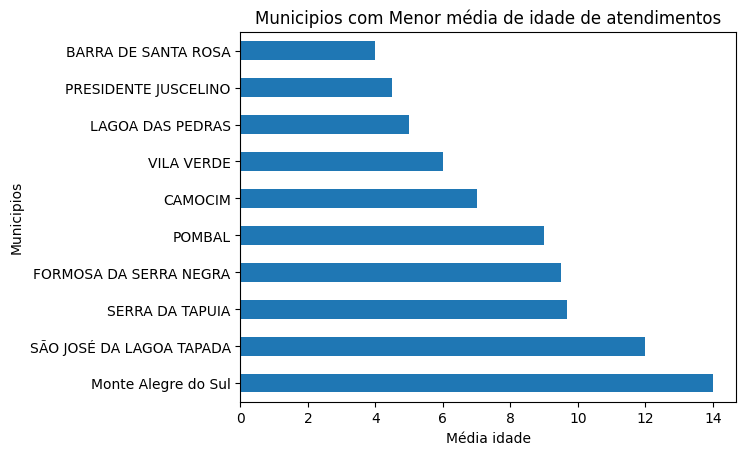

Município
Monte Alegre do Sul         14.000000
SÃO JOSÉ DA LAGOA TAPADA    12.000000
SERRA DA TAPUIA              9.666667
FORMOSA DA SERRA NEGRA       9.500000
POMBAL                       9.000000
CAMOCIM                      7.000000
VILA VERDE                   6.000000
LAGOA DAS PEDRAS             5.000000
PRESIDENTE JUSCELINO         4.500000
BARRA DE SANTA ROSA          4.000000
Name: Idade, dtype: float64

In [112]:
top10_media_menorid_por_municipio = media_menorid_municipio.head(10).sort_values(ascending=False)
top10_media_menorid_por_municipio.plot(kind='barh', x='Município', y='Idade')
plt.xlabel('Média idade')
plt.ylabel('Municipios')
plt.title('Municipios com Menor média de idade de atendimentos')
plt.show()
top10_media_menorid_por_municipio

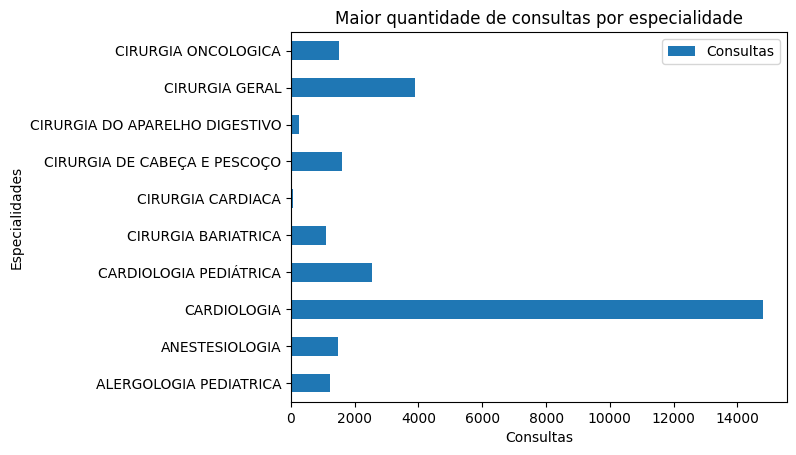

,Especialidade,Consultas
0,ALERGOLOGIA PEDIATRICA,1237
1,ANESTESIOLOGIA,1467
2,CARDIOLOGIA,14810
3,CARDIOLOGIA PEDIÁTRICA,2534
4,CIRURGIA BARIATRICA,1088
5,CIRURGIA CARDIACA,68
6,CIRURGIA DE CABEÇA E PESCOÇO,1608
7,CIRURGIA DO APARELHO DIGESTIVO,250
8,CIRURGIA GERAL,3889
9,CIRURGIA ONCOLOGICA,1509


In [113]:
top10_especialidades = especialidades.head(10)
top10_especialidades.plot(kind='barh', x='Especialidade', y='Consultas')
plt.xlabel('Consultas')
plt.ylabel('Especialidades')
plt.title('Maior quantidade de consultas por especialidade')
plt.show()
top10_especialidades

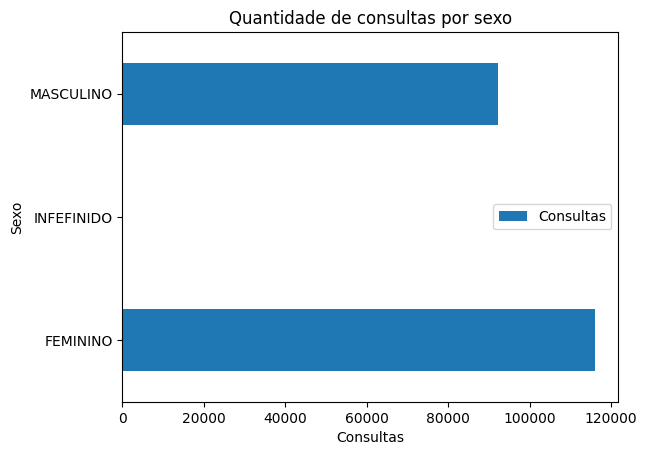

,Sexo,Consultas
0,FEMININO,115989
1,INFEFINIDO,48
2,MASCULINO,92130


In [114]:
consultas_sexo.plot(kind='barh', x='Sexo', y='Consultas')
plt.xlabel('Consultas')
plt.ylabel('Sexo')
plt.title('Quantidade de consultas por sexo')
plt.show()
consultas_sexo